# Coronavirus/COVID-19 Timseries Forecasting

- ~~[GitHub Repo](https://github.com/jirvingphd/playing-with-coronavirus-data)~~
- James M. Irivng, Ph.D.
- james.irving.phd@gmail.com

> **~~NOTE: DATA ACQUISITION IS BEING RE-WORKED IN "Exploring Options for Replacing Covid Tracking Project Data_08-2021.ipnynb"~~** -08/12/21

In [1]:
## Fetch new data (if True (long process - ~2 mins)
RUN_FULL_WORKFLOW = False
RUN_MODELS = False

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Coronavirus/COVID-19-Timseries-Forecasting" data-toc-modified-id="Coronavirus/COVID-19-Timseries-Forecasting-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Coronavirus/COVID-19 Timseries Forecasting</a></span></li><li><span><a href="#Business-Problem" data-toc-modified-id="Business-Problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Business Problem</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Methodology" data-toc-modified-id="Methodology-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Methodology</a></span></li></ul></li></ul></li><li><span><a href="#OBTAIN" data-toc-modified-id="OBTAIN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>OBTAIN</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data</a></span></li></ul></li><li><span><a href="#EDA---Comparing-States" data-toc-modified-id="EDA---Comparing-States-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA - Comparing States</a></span><ul class="toc-item"><li><span><a href="#FL" data-toc-modified-id="FL-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>FL</a></span><ul class="toc-item"><li><span><a href="#Calc-Delta-Cases/Deaths" data-toc-modified-id="Calc-Delta-Cases/Deaths-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Calc Delta Cases/Deaths</a></span></li></ul></li></ul></li><li><span><a href="#Time-Series-Modeling" data-toc-modified-id="Time-Series-Modeling-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Time Series Modeling</a></span><ul class="toc-item"><li><span><a href="#MD" data-toc-modified-id="MD-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>MD</a></span><ul class="toc-item"><li><span><a href="#MD---Cases-New" data-toc-modified-id="MD---Cases-New-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>MD - Cases-New</a></span></li><li><span><a href="#MD---Hospitalized-Currently" data-toc-modified-id="MD---Hospitalized-Currently-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>MD - Hospitalized Currently</a></span></li></ul></li><li><span><a href="#🚨-BOOKMARK:-Data-Quality-Issue---Deaths" data-toc-modified-id="🚨-BOOKMARK:-Data-Quality-Issue---Deaths-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>🚨 BOOKMARK: Data Quality Issue - Deaths</a></span><ul class="toc-item"><li><span><a href="#MD---Deaths-New" data-toc-modified-id="MD---Deaths-New-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>MD - Deaths-New</a></span></li></ul></li></ul></li><li><span><a href="#Function-For-Any-Given-State/-Column" data-toc-modified-id="Function-For-Any-Given-State/-Column-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Function For Any Given State/ Column</a></span></li><li><span><a href="#Making-Plotly-Figures-for-App-[09/12/21]" data-toc-modified-id="Making-Plotly-Figures-for-App-[09/12/21]-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><strong>Making Plotly Figures for App [09/12/21]</strong></a></span><ul class="toc-item"><li><span><a href="#TO-DO's" data-toc-modified-id="TO-DO's-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span><strong>TO DO's</strong></a></span><ul class="toc-item"><li><span><a href="#flexible-data-loading-in-get_state_df_ts" data-toc-modified-id="flexible-data-loading-in-get_state_df_ts-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>flexible data loading in <code>get_state_df_ts</code></a></span></li><li><span><a href="#✔-TO-DO:-make-remove_outliers-into-a-helper-function-and-addd-to-get_state_df_ts" data-toc-modified-id="✔-TO-DO:-make-remove_outliers-into-a-helper-function-and-addd-to-get_state_df_ts-7.1.2"><span class="toc-item-num">7.1.2&nbsp;&nbsp;</span><strong>✔ TO DO: make remove_outliers into a helper function and addd to <code>get_state_df_ts</code></strong></a></span></li><li><span><a href="#Making-Dict/DataFrame-compatible-make_models_flexible" data-toc-modified-id="Making-Dict/DataFrame-compatible-make_models_flexible-7.1.3"><span class="toc-item-num">7.1.3&nbsp;&nbsp;</span>Making Dict/DataFrame compatible <code>make_models_flexible</code></a></span></li></ul></li></ul></li><li><span><a href="#@interact" data-toc-modified-id="@interact-8"><span class="toc-item-num">8&nbsp;&nbsp;</span><code>@interact</code></a></span></li><li><span><a href="#APPENDIX" data-toc-modified-id="APPENDIX-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>APPENDIX</a></span></li></ul></div>

# Business Problem

- Covid-19 and the various strains that have since emerged has upended modern life and fundamental changed how we function as a society.
- Part of what has made it difficult to tackle the pandemic is due to differences between states, state laws/policies, and a lack of public understanding about the predictability of the surges in cases. 


### Goal

- The goal of this notebook is to produce a workflow for producing forecasts of the following metrics at least 1 week ahead of time. 
    - Confirmed Cases
    - Number of Deaths
    - ICU Capacity
    
- The stretch goal for the project is to create a streamlit dashboard for getting state-level forecasts for any state in the US, using fresh daily data.
    

### Methodology

- To select 3-5 prototypical states representing very different time courses/
- Initial Thoughts:
    - NY
    - TX
    - FL
    - MD
    - LA

- See `data_acquisition.py`> `FULL_WORKFLOW()` and `1_Replacing Covid Tracking Project - Simplified Workflow.ipynb` for details (for now)


# OBTAIN

## Imports

In [2]:
# !pip install -U pmdarima
!pip install -U fsds

from fsds.imports import *

fsds v0.4.4 loaded.


Package,Handle,Version,Documentation,Imported
pandas,pd,1.1.3,https://pandas.pydata.org/docs/,Y
fsds,fs,0.4.4,https://fs-ds.readthedocs.io/en/latest/,Y
numpy,np,1.19.5,https://numpy.org/doc/stable/reference/,Y
matplotlib,mpl,3.3.1,https://matplotlib.org/stable/api/index.html,Y
matplotlib.pyplot,plt,,https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot,Y
seaborn,sns,0.11.0,https://seaborn.pydata.org/api.html,Y
IPython.display,dp,,https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html,Y
sklearn,,0.23.2,,N


In [1]:
## Custom Functions and Classes
%load_ext autoreload
%autoreload 2
# import project_functions as fn
import fsds.pandemic as fn

fsds v0.4.4 loaded.


Package,Handle,Version,Documentation,Imported
pandas,pd,1.1.3,https://pandas.pydata.org/docs/,Y
fsds,fs,0.4.4,https://fs-ds.readthedocs.io/en/latest/,Y
numpy,np,1.19.5,https://numpy.org/doc/stable/reference/,Y
matplotlib,mpl,3.3.1,https://matplotlib.org/stable/api/index.html,Y
matplotlib.pyplot,plt,,https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot,Y
seaborn,sns,0.11.0,https://seaborn.pydata.org/api.html,Y
IPython.display,dp,,https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html,Y
sklearn,,0.23.2,,N


In [4]:
import os,glob,sys,joblib,zipfile,json
import re

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_dark"

plt.rcParams['figure.figsize'] = (12,6)
pd.set_option('display.max_columns',0)
# fs.check_package_versions(['statsmodels'],fpath=True)

In [5]:
### FORECAST SPECIFIC FUNCTIONS
import statsmodels.api as sms
import statsmodels.tsa.api as tsa
from pmdarima import auto_arima

fs.check_package_versions(['statsmodels','pmdarima'],fpath=False)

,Package,Version
0,statsmodels,0.12.2
1,pmdarima,1.8.2


In [6]:
import statsmodels
print(f"Statsmodels version: {statsmodels.__version__}")

import pmdarima
print(f"pmdarima version: {pmdarima.__version__}")

Statsmodels version: 0.12.2
pmdarima version: 1.8.2


## Data

In [7]:
## Using new savedd FILE_DIRECTORIES
import os,json,glob

with open("FILE_DIRECTORY.json") as f:
    FPATHS = json.load(f)
FPATHS

{'fpath_raw': './data_raw/',
 'fpath_clean': './data/',
 'fpath_reference': './reference_data/',
 'fpath_state_data': './data/state_data/',
 'fpath_final_states': './data/FINAL_STATES.joblib',
 'fpath_final_df_csv': './data/FINAL_STATES.csv.gz',
 'fpath_final_df_pickle': './data/FINAL_STATES.pickle',
 'name_of_fpath_vars': ['fpath_raw',
  'fpath_clean',
  'fpath_reference',
  'fpath_state_data',
  'fpath_final_states',
  'fpath_final_df_csv',
  'fpath_final_df_pickle',
  'name_of_fpath_vars']}

In [8]:
for path_name,fpath in FPATHS.items():
    try:
        
        found_files =  sorted(os.listdir(fpath))
        print(f"\n[i] Files stored in {path_name}:")
        [print("\t",i,x) for i,x in enumerate(found_files)]
    except:
        pass



[i] Files stored in fpath_raw:
	 0 .ipynb_checkpoints
	 1 CONVENIENT_us_metadata.csv
	 2 RAW_us_confirmed_cases.csv
	 3 RAW_us_deaths.csv
	 4 covid19-data-from-john-hopkins-university.zip
	 5 hospital_data.csv

[i] Files stored in fpath_clean:
	 0 COLUMNS.joblib
	 1 FINAL_STATES.csv.gz
	 2 FINAL_STATES.joblib
	 3 FINAL_STATES.pickle
	 4 STATE_DICT.joblib
	 5 combined_us_states_full_data.csv
	 6 state_data
	 7 us_states_cases_deaths.csv
	 8 us_states_daily_cases_deaths.csv

[i] Files stored in fpath_reference:
	 0 COLUMNS.joblib
	 1 population-by-country-2020.zip
	 2 state_codes_to_names_map.joblib
	 3 state_names_to_codes_map.joblib
	 4 united_states_abbreviations.csv
	 5 us_metadata_counties.csv
	 6 us_metadata_states.csv

[i] Files stored in fpath_state_data:


In [9]:
# RUN_FULL_WORKFLOW=True

In [10]:
# ## making mapper dict to rename new columns
# new_to_match_old_map = {
#     'Deaths':'death',
#     'Cases':'positive',
#     'total_adult_patients_hospitalized_confirmed_covid':'hospitalizedCurrently',
# 'adult_icu_bed_covid_utilization_numerator':'inIcuCurrently'}
# ## making mapper dict to rename new columns
# new_to_final_names = {
#     'Deaths':'Deaths',
#     'Cases':'Cases',
#     'total_adult_patients_hospitalized_confirmed_covid':'Hospitalized Currently',
# 'adult_icu_bed_covid_utilization_numerator':'ICU-Covid Currently'}
# list(new_to_final_names.keys())

In [11]:
FPATHS

{'fpath_raw': './data_raw/',
 'fpath_clean': './data/',
 'fpath_reference': './reference_data/',
 'fpath_state_data': './data/state_data/',
 'fpath_final_states': './data/FINAL_STATES.joblib',
 'fpath_final_df_csv': './data/FINAL_STATES.csv.gz',
 'fpath_final_df_pickle': './data/FINAL_STATES.pickle',
 'name_of_fpath_vars': ['fpath_raw',
  'fpath_clean',
  'fpath_reference',
  'fpath_state_data',
  'fpath_final_states',
  'fpath_final_df_csv',
  'fpath_final_df_pickle',
  'name_of_fpath_vars']}

In [12]:
os.listdir(FPATHS['fpath_clean'])

['us_states_daily_cases_deaths.csv',
 'state_data',
 'combined_us_states_full_data.csv',
 'us_states_cases_deaths.csv',
 'STATE_DICT.joblib',
 'FINAL_STATES.joblib',
 'FINAL_STATES.csv.gz',
 'COLUMNS.joblib',
 'FINAL_STATES.pickle']

In [13]:
## Uncomment Cell to acquire new data
if RUN_FULL_WORKFLOW:
    DF,STATES = fn.data_acquisition.FULL_WORKFLOW(merge_hospital_data=True)
    ## renaming since merge_hofspital_data=True
#     DF = DF.copy()
#     print(STATES.keys())    
    
else:
    print(f"[i] Using previously downloaded data...")
    DF = pd.read_pickle(FPATHS['fpath_final_df_pickle'])
    
#     with open(FPATHS['fpath_final_states']) as f:
    STATES = joblib.load(FPATHS['fpath_final_states'])
#     DF = pd.read_csv(os.path.join(fpath_clean,
#                                          'combined_us_states_full_data.csv'))
#     STATES = joblib.load(os.path.join(fpath_clean,'STATE_DICT.joblib'))

display(DF.head())
print(STATES.keys())

[i] Using previously downloaded data...


Deaths  Cases  Hospitalized Currently  ICU-Covid Currently  Deaths-New  Cases-New
   Date                                                                                         
AK 2020-03-23       0     39                     0.0                  0.0         0.0        0.0
   2020-03-24       0     43                     0.0                  0.0         0.0        4.0
   2020-03-25       1     50                     0.0                  0.0         1.0        7.0
   2020-03-26       1     64                     0.0                  0.0         0.0       14.0
   2020-03-27       1     75                     0.0                  0.0         0.0       11.0

dict_keys(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])


# EDA - Comparing States

## FL

In [14]:
FL = STATES['FL'].copy()
FL

,Deaths,Cases,Hospitalized Currently,ICU-Covid Currently,Deaths-New,Cases-New
Date,,,,,,
2020-03-12,2,30,0.0,0.0,0.0,0.0
2020-03-13,2,50,0.0,0.0,0.0,20.0
2020-03-14,2,76,0.0,0.0,0.0,26.0
2020-03-15,3,100,0.0,0.0,1.0,24.0
2020-03-16,3,101,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
2021-09-02,43979,3223249,14269.0,3283.0,0.0,0.0
2021-09-03,46324,3352451,13778.0,3251.0,2345.0,129202.0
2021-09-04,46324,3352451,13409.0,3210.0,0.0,0.0


In [15]:
## first non-null hospital timestamps
first_ts = FL[FL['Hospitalized Currently'].notna()].index[0]
first_ts

Timestamp('2020-03-12 00:00:00')

### Calc Delta Cases/Deaths

In [16]:
FL.columns

Index(['Deaths', 'Cases', 'Hospitalized Currently', 'ICU-Covid Currently',
       'Deaths-New', 'Cases-New'],
      dtype='object')

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

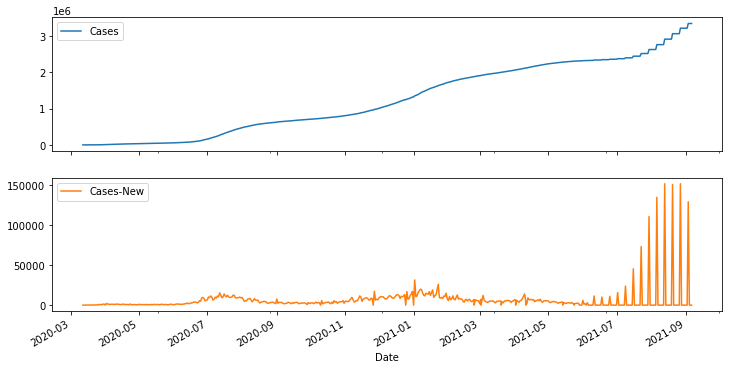

In [17]:
## Plot deaths/cases
cumulative_cols = [c for c in FL.columns for name in ['Daths','Cases']if name in c]
FL[cumulative_cols].plot(subplots=True)

In [18]:
import plotly
plotly.__version__

'5.3.1'

<AxesSubplot:>

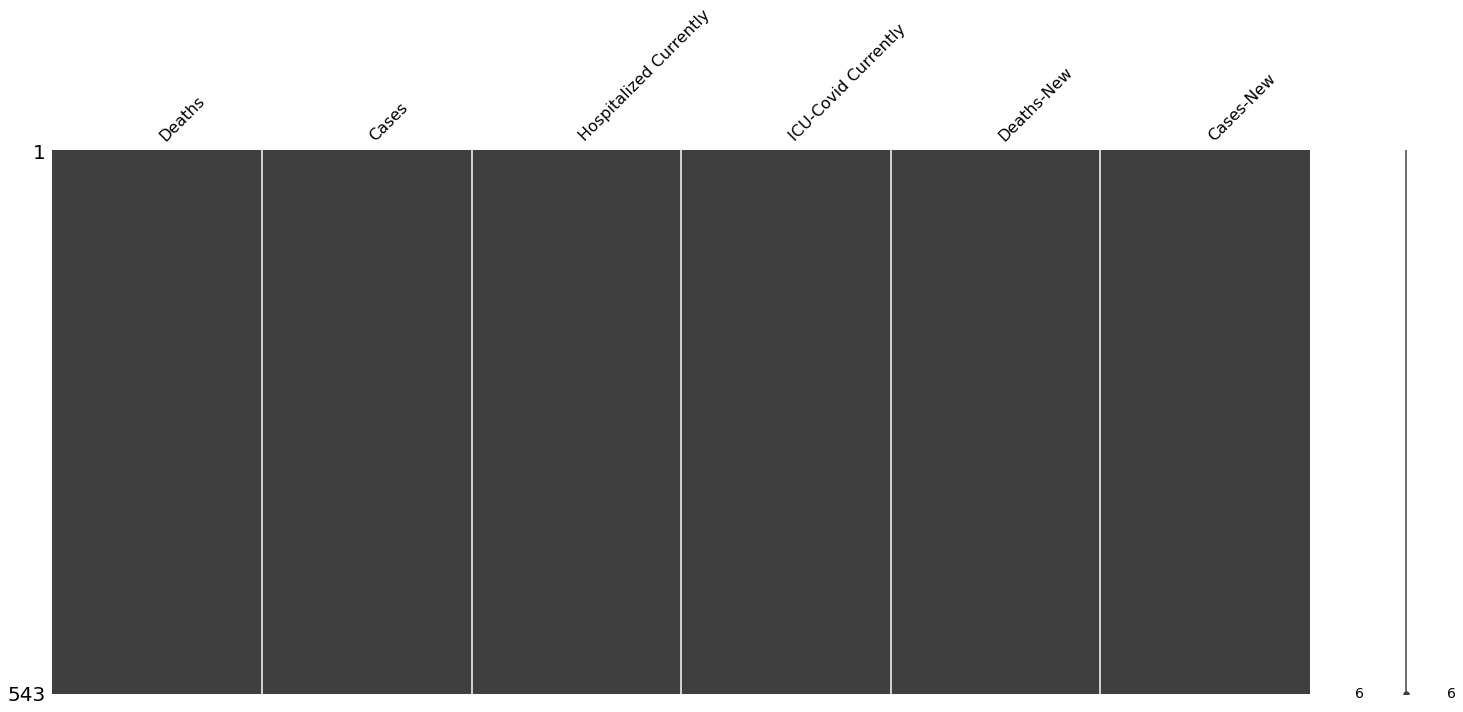

In [19]:
import missingno
missingno.matrix(FL)

In [20]:
# px.imshow(FL.isna(),template='plotly_dark',color_continuous_scale="Reds")

In [21]:
plot_cols = FL.drop(columns=cumulative_cols).columns
plot_cols

Index(['Deaths', 'Hospitalized Currently', 'ICU-Covid Currently',
       'Deaths-New'],
      dtype='object')

In [22]:
import plotly 
plotly.__version__

'5.3.1'

In [23]:
pfig = px.line(FL,y=plot_cols,width=1000,title="FL Data")
pfig.add_vline(first_ts,line_width=3,line_dash="dash",name='Start')
pfig.show()

In [24]:
# raise Exception('end of 09/01/21, though below code is still good.')

# Time Series Modeling

In [25]:
### FORECAST SPECIFIC FUNCTIONS
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sms
import statsmodels.tsa.api as tsa
from pmdarima import auto_arima

## MD

In [26]:
state = "MD"
df_state = STATES[state].loc['08-2020':].copy()
# df_state = df_state.interpolate('time')
# df_state['Deaths-New'] = df_state['Deaths'].diff()
# df_state['Cases-New'] = df_state['Cases'].diff()
df_state = df_state.resample('D').sum()

print(df_state.isna().sum())
df_state

Deaths                    0
Cases                     0
Hospitalized Currently    0
ICU-Covid Currently       0
Deaths-New                0
Cases-New                 0
dtype: int64


,Deaths,Cases,Hospitalized Currently,ICU-Covid Currently,Deaths-New,Cases-New
Date,,,,,,
2020-08-01,3506,89365,629.0,171.0,13.0,1019.0
2020-08-02,3515,90274,572.0,180.0,9.0,909.0
2020-08-03,3523,91144,574.0,176.0,8.0,870.0
2020-08-04,3530,91854,576.0,191.0,7.0,710.0
2020-08-05,3536,92426,571.0,186.0,6.0,572.0
...,...,...,...,...,...,...
2021-09-02,10040,499648,799.0,212.0,16.0,1272.0
2021-09-03,10051,501035,813.0,222.0,11.0,1387.0
2021-09-04,10061,502229,825.0,219.0,10.0,1194.0


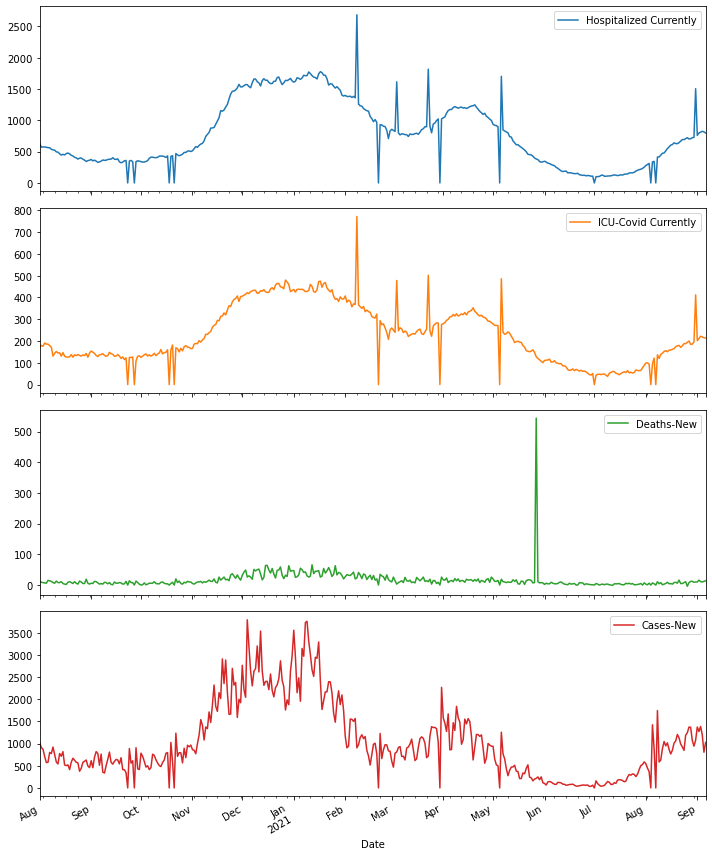

In [27]:
model_cols = ['Hospitalized Currently','ICU-Covid Currently',
              'Deaths-New','Cases-New'
             ]

## visualize
ax = df_state[model_cols].plot(subplots=True, figsize=(10,12))
plt.tight_layout();

#### Data Quality Issues
- There are strong spikes +/- that are not likely to be real values.

### MD - Cases-New

In [28]:
# col = 'Cases-New'
# ts = df_state[col].copy()
# ax = ts.plot(title=f"{state}-{col}");
# ax.set_ylabel(col)

#### Train Test Split

In [29]:
# train,test = fn.modeling.train_test_split_ts(ts,split_index=-30)

#### Checking Seasonal Decompose for Seasonality to Use

In [30]:
# ## Get Decomposed time sereis
# decomp = tsa.seasonal_decompose(train)
# decomp.plot();

In [31]:
# ax = decomp.seasonal.loc['01-2021'].plot(figsize=(12,5))
# ax.grid(which='both')

- Seasonality appears to be ~7 days

In [32]:
# fn.modeling.stationarity_check(train.diff(7).dropna(),window=4);

In [33]:
# fn.modeling.plot_acf_pacf(train,);

In [34]:
# fn.modeling.plot_acf_pacf(train,diff=7);

> Add notes about COVID insights from acf/pacf

#### GridSearch SARIMA Orders

In [35]:
# from pmdarima import auto_arima

# auto_model = auto_arima(train,m=7,trace=True,D=1,
#                         start_p=0, start_q=0,
#                         start_P=0, start_Q=0)
# auto_model.summary()

#### Use Best Params for new SARIMAX

In [36]:
# model = tsa.SARIMAX(train, order=auto_model.order, 
#                     seasonal_order =auto_model.seasonal_order,
#                     enforce_invertibility=False,
#                     enforce_stationarity=False, 
#                     freq='D').fit()

# fn.modeling.evaluate_model(model,train,test,last_n_lags=180)

#### Next: if happy with forecast, train on entire ts

In [37]:
# model = tsa.SARIMAX(ts,order=auto_model.order, 
#                     seasonal_order =auto_model.seasonal_order,
#                     enforce_invertibility=False,
#                     enforce_stationarity=False, 
#                     freq='D').fit()
# fn.modeling.diagnose_model(model)
# fn.modeling.plot_forecast(model, ts)

### MD - Hospitalized Currently

In [38]:
# df_state['Hospitalized Currently']

In [39]:
# col = 'Hospitalized Currently'
# ts = df_state[col].copy()
# ax = ts.plot(title=f"{state}-{col}");
# ax.set_ylabel(col)

#### Train Test Split

In [40]:
# train,test = fn.modeling.train_test_split_ts(ts,split_index=-30)

#### Checking Seasonal Decompose for Seasonality to Use

In [41]:
# ## Get Decomposed time sereis
# decomp = tsa.seasonal_decompose(train)
# decomp.plot();

In [42]:
# ax = decomp.seasonal.loc['01-2021'].plot()
# ax.grid(which='both')

- Seasonality appears to be ~7 days

In [43]:
# fn.modeling.stationarity_check(train.diff(7).dropna(),window=4);

In [44]:
# fn.modeling.plot_acf_pacf(train,);

In [45]:
# fn.modeling.plot_acf_pacf(train,diff=7);

> Add notes about COVID insights from acf/pacf

#### GridSearch SARIMA Orders

In [46]:
# from pmdarima import auto_arima

# auto_model = auto_arima(train,m=7,trace=True,D=1,
#                         start_p=0, start_q=0,
#                         start_P=0, start_Q=0)
# auto_model.summary()

#### Use Best Params for new SARIMAX

In [47]:
# model = tsa.SARIMAX(train, order=auto_model.order, 
#                     seasonal_order =auto_model.seasonal_order,
#                     enforce_invertibility=False,
#                     enforce_stationarity=False, 
#                     freq='D').fit()

# fn.modeling.evaluate_model(model,train,test,last_n_lags=180)

#### Next: if happy with forecast, train on entire ts

In [48]:
# model = tsa.SARIMAX(ts,order=auto_model.order, 
#                     seasonal_order =auto_model.seasonal_order,
#                     enforce_invertibility=False,
#                     enforce_stationarity=False, 
#                     freq='D').fit()
# fn.modeling.diagnose_model(model)
# fn.modeling.plot_forecast(model, ts)

## 🚨 BOOKMARK: Data Quality Issue - Deaths

- To Do: Remove outliers.
    - Try using .diff() and a high threshold for deterining outliers

### MD - Deaths-New

Text(0, 0.5, 'Deaths-New')

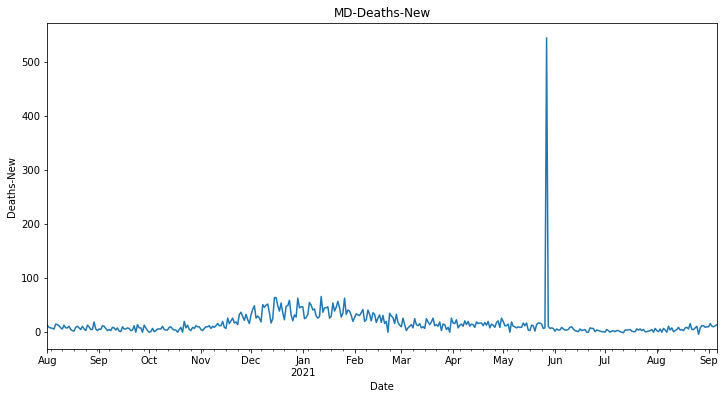

In [49]:
col = 'Deaths-New'
ts = df_state[col].copy()
ax = ts.plot(title=f"{state}-{col}");
ax.set_ylabel(col)

In [50]:
## saving deltas 
deltas  = ts.diff()

## SSaving outleirs
threshold=100
outliers = deltas[deltas.abs()>threshold]
outliers

Date
2021-05-27    536.0
2021-05-28   -533.0
Freq: D, Name: Deaths-New, dtype: float64

In [51]:
outliers= deltas[deltas.abs()>threshold]
outliers

Date
2021-05-27    536.0
2021-05-28   -533.0
Freq: D, Name: Deaths-New, dtype: float64

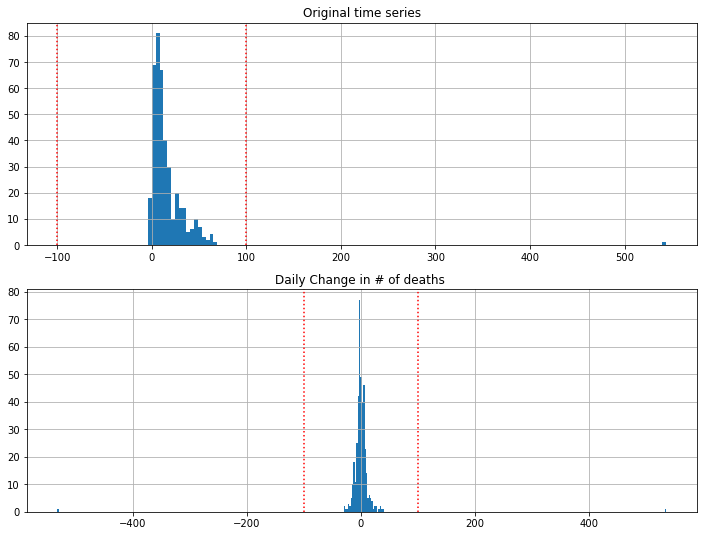

In [52]:
## saving deltas 
fig, axes = plt.subplots(nrows=2,figsize=(12,9))
ax0 = ts.hist(bins='auto',ax=axes[0])
ax0.set(title='Original time series')

## saving deltas 
ax1 = deltas.hist(bins='auto',ax=axes[1])
ax1.set(title='Daily Change in # of deaths ');

for ax in axes:
    ax.axvline(threshold,ls=':',c='red')
    ax.axvline(-threshold,ls=':',c='red')

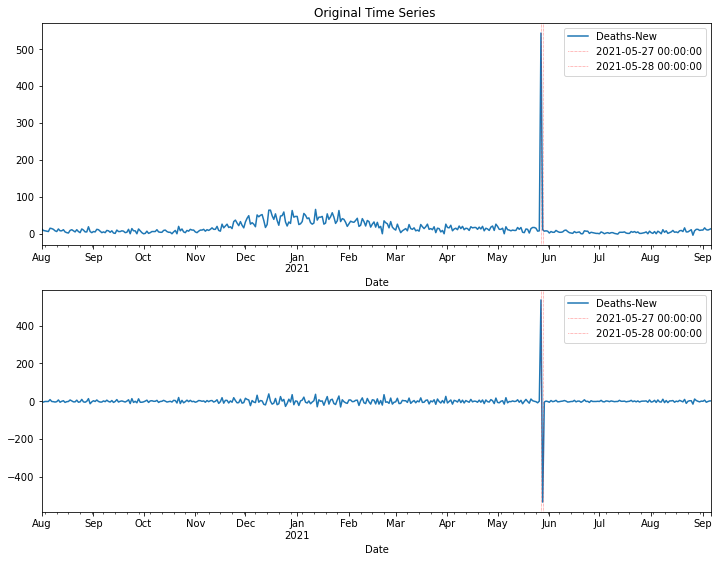

In [53]:
## Plotting High Deltas on original time seires

## saving deltas 
fig, axes = plt.subplots(nrows=2,figsize=(12,9))

ax =axes[0]
ts.plot(ax = ax)
ax.set(title='Original Time Series ')

deltas.plot(ax=axes[1])
for ax in axes:
    [ax.axvline(x_val,label=x_val,lw=0.5,ls = ':',color='red') for x_val in outliers.index]
    ax.legend()



> The issues seem to be entirely in the deltas and therefore 

<AxesSubplot:xlabel='Date'>

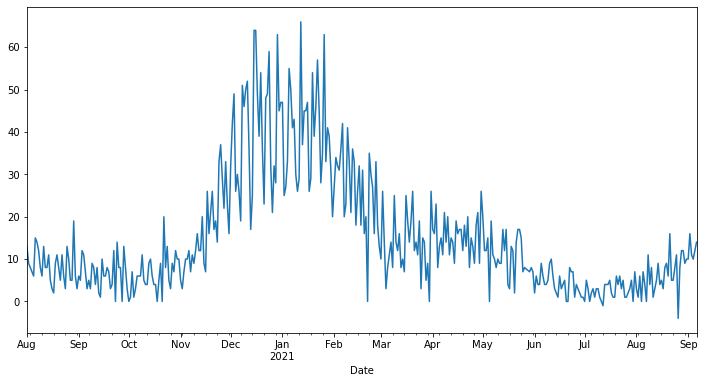

In [54]:
## saving deltas 
deltas  = ts.diff()

## SSaving outleirs
threshold=100
outliers = deltas[deltas.abs()>threshold]


## Filling in outliers
ts.loc[outliers.index] = np.nan
ts.interpolate(inplace=True)
ts.plot()

<AxesSubplot:xlabel='Date'>

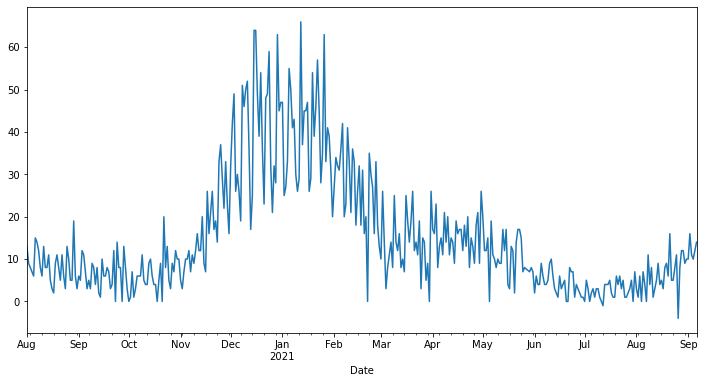

In [55]:

## Filling in outliers
ts.loc[outliers.index] = np.nan
ts.interpolate(inplace=True)
ts.plot()

In [56]:
# raise Exception('Deal with the data quality issue above')

#### Train Test Split

Using a cutoff index of -30, which = 08-08-2021


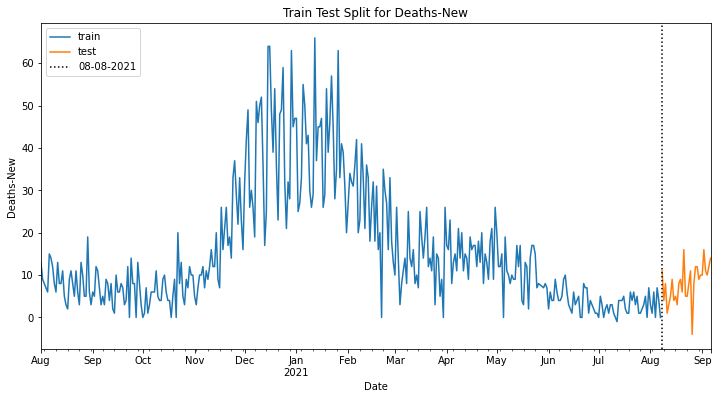

In [57]:
train,test = fn.modeling.train_test_split_ts(ts,split_index=-30)

#### Checking Seasonal Decompose for Seasonality to Use

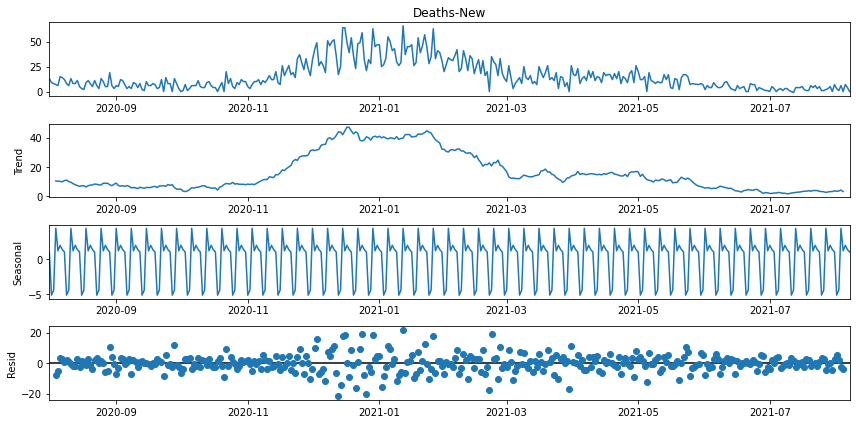

In [58]:
## Get Decomposed time sereis
decomp = tsa.seasonal_decompose(train)
decomp.plot();

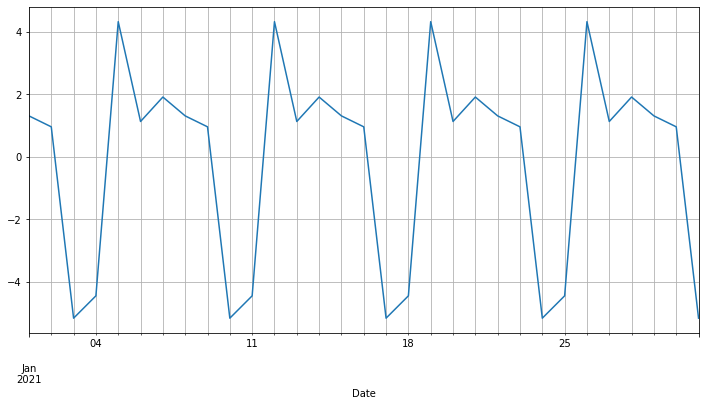

In [59]:
ax = decomp.seasonal.loc['01-2021'].plot()
ax.grid(which='both')

- Seasonality appears to be ~7 days

,Test Statistic,#Lags Used,# of Observations Used,p-value,p<.05,Stationary?
AD Fuller Results,-3.51631,14,350,0.007578,True,True


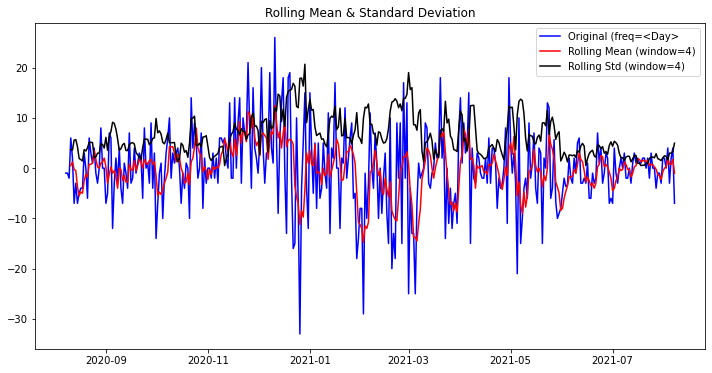

In [60]:
fn.modeling.stationarity_check(train.diff(7).dropna(),window=4);

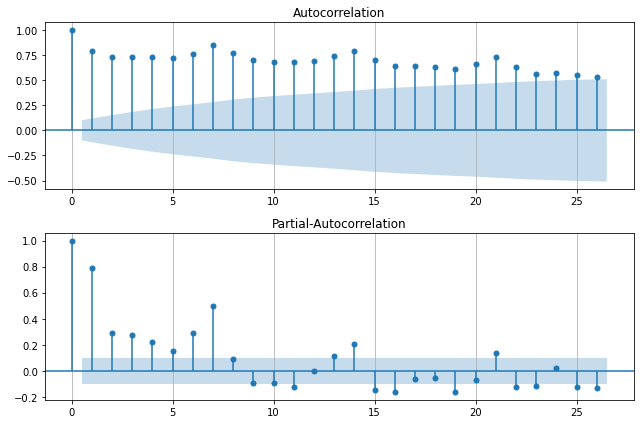

In [61]:
fn.modeling.plot_acf_pacf(train,);

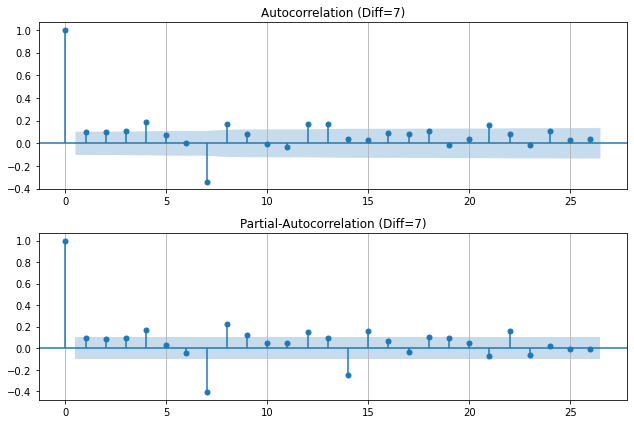

In [62]:
fn.modeling.plot_acf_pacf(train,diff=7);

> Add notes about COVID insights from acf/pacf

#### GridSearch SARIMA Orders

In [63]:
from pmdarima import auto_arima

if RUN_MODELS==True:
    auto_model = auto_arima(train,m=7,trace=True,D=1,
                            start_p=0, start_q=0,
                            start_P=0, start_Q=0)
    display(auto_model.summary())

#### Use Best Params for new SARIMAX

In [64]:
if RUN_MODELS==True:
    model = tsa.SARIMAX(train, order=auto_model.order, 
                    seasonal_order =auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False, 
                    freq='D').fit()

    fn.modeling.evaluate_model(model,train,test,last_n_lags=180)

#### Next: if happy with forecast, train on entire ts

In [65]:
if RUN_MODELS==True:
    model = tsa.SARIMAX(ts,order=auto_model.order, 
                    seasonal_order =auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False, 
                    freq='D').fit()
    fn.modeling.diagnose_model(model)
    fn.modeling.plot_forecast(model, ts)

# Function For Any Given State/ Column

<AxesSubplot:xlabel='Date'>

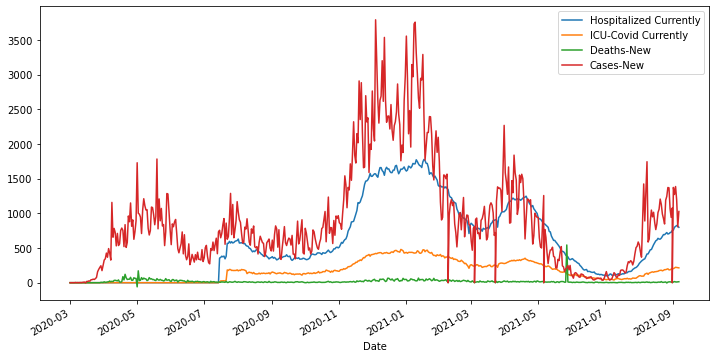

In [66]:
## test function
ts = STATES['MD'].copy()
ts.drop(['Deaths','Cases'],1).plot()

<AxesSubplot:xlabel='Date'>

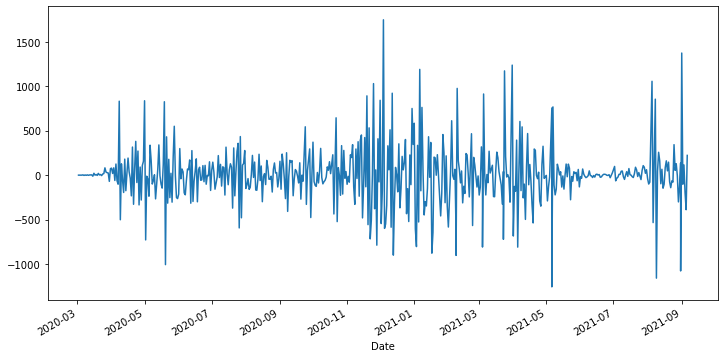

In [67]:
ts['Cases-New'].diff().plot()

In [68]:
# state = "NY"
# col = 'Deaths'#'Hospitalized Currently'
# start_date='08-2020'
# remove_outliers=True
# threshold=100
# plot=True


# df_state = STATES[state].loc[start_date:].copy()
# df_state = df_state.resample('D').sum()
# ts = df_state[col].copy()
# ts.index.name='Datetime'

# # ts = ts.resample('D').asfreq()
# ts

In [69]:
def make_timeseries_model(STATES,state = "MD",col = 'Cases-New',
                          start_date='08-2020',split_index=-30,
                         remove_outliers=True,threshold=100,
                         plot=True):
    
    eq = ' '+'==='*30
    
    auto_arima_params = dict(m=7,trace=True,D=1,
                            start_p=0, start_q=0,
                            start_P=0, start_Q=0)
    print(eq,f"\n\tStarting pdmdarima arma grid search for {state} - {col}\n".upper(),
          eq,"\n\t\t{")
    [print(f"\t\t{k} : {v}") for k,v in auto_arima_params.items()]
    print("\t}")
    

    ## Slicing out state df for index dates 
    df_state = STATES[state].loc[start_date:].copy()
    df_state = df_state.resample('D').sum()
    ts = df_state[col].copy()

    ## Outlier removal  #### REPLACE WITH HELPER FUNCTION
    if remove_outliers:
        ## saving deltas 
        deltas  = ts.diff()

        ## SSaving outleirs
        outliers = deltas[deltas.abs()>threshold]


        ## Filling in outliers
        ts.loc[outliers.index] = np.nan
        ts.interpolate(inplace=True)
    
#     if plot:
#         ax = ts.plot(title=f"{state} - {col}");
#         ax.set_ylabel(col)
#         display(ax.get_figure())
        
        

    from pmdarima import auto_arima
    train,test = fn.modeling.train_test_split_ts(ts,split_index=split_index)
    
    ## update axis/labels
    ax = plt.gca()
    ax.set(title=f"{state} - {col}",ylabel=col);
    plt.show()
    
    

    auto_model = auto_arima(train,**auto_arima_params)
    display(auto_model.summary())
        
    model = tsa.SARIMAX(train, order=auto_model.order, 
                    seasonal_order =auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False, 
                    freq='D').fit()

    fn.modeling.evaluate_model(model,train,test,last_n_lags=180)
    
    
    model = tsa.SARIMAX(ts,order=auto_model.order, 
                    seasonal_order =auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False, 
                    freq='D').fit()
    fn.modeling.diagnose_model(model)
    fn.modeling.plot_forecast(model, ts)
    
    return ts, model
    
    
    

In [70]:
if RUN_MODELS:
    # if RUN_MODELS==True:
    ts,model = make_timeseries_model_flexible(STATES,'NY','Hospitalized Currently')


# **Making Plotly Figures for App [09/12/21]**

## **TO DO's**

- [ ] **To DO: reconcile old functions with new data.**
    - When comparing current code with old dash app and related functions, realized old dash expected a dataframe with the states as the columns and that the new functions were especting a dictionary.
    - My current version fo the dataframe (`DF`), has the states and dates as a multi-index, not columns

- [ ] update `project_functions.timeseries_modeling`  with new `make_time_series_model_flexible`**


- [ ] update `project_functions.app_functions` with new:
    - `get_state_df_ts`
    - `remove_outliers_df`

       
- [ ] **add outlier removal to get_state_df_ts???**

In [71]:
%load_ext autoreload
%autoreload 2
from project_functions import app_functions as af
# dir(af)

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_dark"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### flexible data loading in `get_state_df_ts`

In [72]:
## to replace af.get_state_ts
### BEST VERSION YET! 09/12 ######
def get_state_df_ts(DF, state_name,name_sep=' - ',state_first=True, ts_col=None,
                     freq='D',
                 start_date='08-2020',group_col='state',#legacy compatible
                 agg_func='sum'):
    """Take df_us and extracts state's data as then Freq/Aggregation provided"""
    
    if isinstance(STATES,dict):
        state_df = STATES[state].copy()
        
    elif isinstance(STATES, pd.DataFrame):
        ## Slicing out state df for index dates 
        state_df = DF.loc[state].copy()

    else:
        ## Get state_df group
        state_df = df.groupby(group_col).get_group(state_name)#.resample(freq).agg(agg)

    
    ## Resample and aggregate state data
    state_df = state_df.resample(freq).agg(agg_func)
    state_df = state_df.loc[start_date:]
    
    ## Get and Rename Sum Cols 
    orig_cols = state_df.columns

    ## Create Renamed Sum columns
    for col in orig_cols:
        
        if state_first==True:
            new_col_name = f"{state_name}{name_sep}{col}"
        else:
            new_col_name = f"{col}{name_sep}{state_name}"
            
        state_df[new_col_name] = state_df[col].copy()
      
    ## Drop original cols
    state_df.drop(orig_cols,axis=1,inplace=True)
    
    
    ## Return on columns containing ts_cols
    if ts_col is not None:

        if isinstance(ts_col,str):
            ts_col = [ts_col]

        
        selected_cols=[]
        for col in ts_col:
            selected_cols.extend([c for c in state_df.columns if c.endswith(col)])
            
        state_df = state_df[selected_cols]
        
    ## Add outlier removal here:
    
    return state_df

In [74]:
def get_states_to_plot(DF,state_list=["NY",'MD','FL'],
                plot_cols=['Deaths-New', 'Cases-New'] ):
    ## Get each state
    dfs_to_concat = []
    for state in state_list:
        dfs = get_state_df_ts(DF,state,ts_col=plot_cols)
        dfs_to_concat.append(dfs)
     ## Concatenate final dfs
    try:
        plot_df = pd.concat(dfs_to_concat,axis=1)#[STATES[s] for s in plot_states],axis=1).iplot()
    except:
        print('[!] pd.concat failed, returning list...')
        plot_df = dfs_to_concat
    return plot_df

### **✔ TO DO: make remove_outliers into a helper function and addd to `get_state_df_ts`**

In [76]:
def remove_outliers_ts(ts,threshold_type='raw',threshold=100, n_diff=1):
    ## saving deltas 
    deltas  = ts.diff(n_diff)
    
    
    ## Criterion
    if threshold_type=='raw':
        idx_outliers = deltas.abs()>threshold
        
#     elif threshold_type :
#         pass
    else:
        raise Exception("threshold_kinds are not yet implemented")
        pass
    ## SSaving outleirs
    outliers = deltas[idx_outliers]


    ## Filling in outliers
    ts.loc[outliers.index] = np.nan
    ts_out = ts.interpolate()
    
    return ts_out
     
    


In [73]:
test_df = get_state_df_ts(DF,'TX',state_first=False)
test_df.tail(2)

,Deaths - TX,Cases - TX,Hospitalized Currently - TX,ICU-Covid Currently - TX,Deaths-New - TX,Cases-New - TX
Date,,,,,,
2021-09-05,10073,503034,815.0,215.0,12.0,805.0
2021-09-06,10087,504061,799.0,214.0,14.0,1027.0


In [80]:
plot_df = get_states_to_plot(DF,#state_list=['CA','PA'],
                            plot_cols=['Cases-New'])
px.line(plot_df)

In [81]:
plot_df

,NY - Cases-New,MD - Cases-New,FL - Cases-New
Date,,,
2020-08-01,1019.0,1019.0,1019.0
2020-08-02,909.0,909.0,909.0
2020-08-03,870.0,870.0,870.0
2020-08-04,710.0,710.0,710.0
2020-08-05,572.0,572.0,572.0
...,...,...,...
2021-09-02,1272.0,1272.0,1272.0
2021-09-03,1387.0,1387.0,1387.0
2021-09-04,1194.0,1194.0,1194.0


In [77]:
raise Exception('Confusion below!')

Exception: Confusion below!

In [ ]:
def test_plot(DF,state_list=["NY",'MD','FL'],plot_cols=['Deaths-New',
                                                           'Cases-New']):
    ## Get each state
    dfs_to_concat = []
    for state in state_list:
        dfs = get_state_df_ts(DF,state,ts)
        print(state, dfs.index.freq)
        
        
#         dfs = STATES[state].copy()
        dfs.columns = [f"{state}: {col}" for col in dfs.columns]
        
        for col in plot_cols:
            cols = [c for c in dfs.columns if col.endswith(col)]
            dfs_to_concat.append(dfs[cols].copy())
      
     ## Concatenate final dfs
    try:
        plot_df = pd.concat(dfs_to_concat,axis=1)#[STATES[s] for s in plot_states],axis=1).iplot()
    except:
        print('[!] pd.concat failed, returning list...')
        plot_df = dfs_to_concat
    return plot_df
        # Grab each state's df and save to STATES
#         dfs = get_state_ts(df,state)
#         STATES[state] = dfs


#         ## for each plot_cols, find all columns that contain that col name
#         for plot_col in plot_cols:
#             concat_dfs.append(dfs[[col for col in dfs.columns if col.endswith(plot_col)]])#plot_col in col]])



#     ## Set title and df if new_only
#     if new_only:
#         plot_df = plot_df.diff()
#         title = "Coronavirus Cases by State - New Cases"
#     else:
#         title = 'Coronavirus Cases by State - Cumulative'

#     ## Reset Indes
#     plot_df.reset_index(inplace=True)


#     ## Return Df or plot
#     if df_only==False:

#         if np.any(['per capita' in x.lower() for x in plot_cols]):
#             value_name = "# of Cases - Per Capita"
#         else:
#             value_name='# of Cases'


#         pfig_df_melt = plot_df.melt(id_vars=['Date'],var_name='State',
#                                     value_name=value_name)

#         if plot_scatter:
#             plot_func = px.scatter
#         else:
#             plot_func = px.line


#         # Plot concatenated dfs
#         pfig = plot_func(pfig_df_melt,x='Date',y=value_name,color='State',
#                       title=title,template='plotly_dark',width=1000,height=700)        
# #         pfig.update_xaxes(rangeslider_visible=True)


In [ ]:
dfs_to_plot = test_plot(DF)
dfs_to_plot[4]

In [ ]:
pd.concat(dfs_to_plot)

### Making Dict/DataFrame compatible `make_models_flexible`

- [ ] Replace `make_timeseries_model_flexible`'s data loading with `get_state_df_ts`

In [ ]:
def make_timeseries_model_flexible(STATES,state = "MD",col = 'Cases-New',
                          start_date='08-2020',split_index=-30,
                         remove_outliers=True,threshold=100,freq='D',
                         plot=True):
    
    
    
    
    eq = ' '+'==='*30
    
    auto_arima_params = dict(m=7,trace=True,D=1,
                            start_p=0, start_q=0,
                            start_P=0, start_Q=0)
    print(eq,f"\n\tStarting pdmdarima arma grid search for {state} - {col}\n".upper(),
          eq,"\n\t\t{")
    [print(f"\t\t{k} : {v}") for k,v in auto_arima_params.items()]
    print("\t}")
    
    if isinstance(STATES,dict):
        df_state = STATES[state].loc[start_date:].copy()
        
    elif isinstance(STATES, pd.DataFrame):
        ## Slicing out state df for index dates 
        df_state = DF.loc[state].loc[start_date:].copy()
        
    df_state = df_state.resample(freq).sum()
    ts = df_state[col].copy()

    

     #### Outlier removal  #### REPLACE WITH HELPER FUNCTION ####
    if remove_outliers:
        ## saving deltas 
        deltas  = ts.diff()

        ## SSaving outleirs
        outliers = deltas[deltas.abs()>threshold]


        ## Filling in outliers
        ts.loc[outliers.index] = np.nan
        ts.interpolate(inplace=True)
    
#     if plot:
#         ax = ts.plot(title=f"{state} - {col}");
#         ax.set_ylabel(col)
#         display(ax.get_figure())
     #### #### #### #### #### #### #### #### #### #### #### ####  
    
    
    
    from pmdarima import auto_arima
    train,test = fn.modeling.train_test_split_ts(ts,split_index=split_index)
    
    ## update axis/labels
    ax = plt.gca()
    ax.set(title=f"{state} - {col}",ylabel=col);
    plt.show()
    
    

    auto_model = auto_arima(train,**auto_arima_params)
    display(auto_model.summary())
        
    model = tsa.SARIMAX(train, order=auto_model.order, 
                    seasonal_order =auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False, 
                    freq='D').fit()

    fn.modeling.evaluate_model(model,train,test,last_n_lags=180)
    
    
    model = tsa.SARIMAX(ts,order=auto_model.order, 
                    seasonal_order =auto_model.seasonal_order,
                    enforce_invertibility=False,
                    enforce_stationarity=False, 
                    freq='D').fit()
    fn.modeling.diagnose_model(model)
    fn.modeling.plot_forecast(model, ts)
    
    return ts, model
    

In [ ]:
if RUN_MODELS:
    # if RUN_MODELS==True:
    ts,model = make_timeseries_model_flexible(DF,'NY','Hospitalized Currently')

# `@interact`

In [ ]:
raise Exception("stop here to avoid interactive menu")

In [ ]:
from ipywidgets import interact
import datetime as dt

@interact
def get_model(state=list(STATES.keys()),
             col=list(STATES['NY'].columns),model=False):
    if model:
        start = dt.datetime.now()
        ts,model = make_timeseries_model(STATES,state,col)
        end = dt.datetime.now()
        print(f'Modeling Process took {end-start} sec.')

# APPENDIX

In [ ]:
# !pip instal streamlit 
# !streamlist run app.py
!code app.py